Model loaded successfully!
Please upload an image for prediction:


Saving test_forestfire.jpg to test_forestfire (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


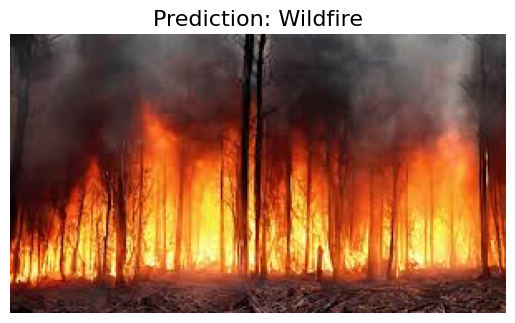

In [ ]:
import tkinter as tk
from tkinter import filedialog

from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model

# Load the model
model = load_model("/content/drive/MyDrive/ffd_model.h5")
print("Model loaded successfully!")

import numpy as np
from PIL import Image
import io
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

# Load your trained model (provide the correct path to your model file)
# Replace "your_model_path.h5" with the actual path to your model


# Function to preprocess and predict an image
def predict_image(uploaded_file):
    # Open the uploaded image
    img = Image.open(io.BytesIO(uploaded_file)).resize((64, 64))
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(img_array)[0][0]  # Get scalar prediction
    result = "Wildfire" if prediction > 0.5 else "No Wildfire"

    # Display the image and prediction
    plt.imshow(np.array(Image.open(io.BytesIO(uploaded_file))))
    plt.axis('off')
    plt.title(f"Prediction: {result}", fontsize=16)
    plt.show()

# Upload an image using Colab's file upload widget
print("Please upload an image for prediction:")
uploaded = files.upload()  # Allows user to upload an image

if uploaded:
    # Process the first uploaded file
    file_name = next(iter(uploaded.keys()))
    predict_image(uploaded[file_name])